In [1]:
import pandas as pd
import os
import requests
import swifter
import concurrent.futures
from tqdm import tqdm
import openpyxl
import cv2

In [2]:
import aiohttp
import asyncio
import httpx
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import unidecode

In [3]:
import string
from autocorrect import Speller
from stop_words import get_stop_words

In [4]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
stoplist = stopwords.words('english') 
stoplist = set(stoplist)

In [7]:
# !pip install aiohttp
# !pip install httpx
# !pip install --upgrade anyio
# !pip install autocorrect
# !pip install stop_words

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
base_folder_location = "E:/"

In [10]:
# !pip install opencv-python

In [11]:
image_path = os.path.join(base_folder_location, "image")
excel_path = os.path.join(base_folder_location, "excel")

In [8]:
# Ingredient layer 1 information JSON to Dataframe conversion
ingredient_layer_1_information_df = pd.read_json(os.path.join(base_folder_location, "layer1.json"))

In [9]:
# ingredient_layer_1_information_df 
ingredient_layer_1_information_df.head(20)

,ingredients,url,partition,title,id,instructions
0,"[{'text': '6 ounces penne'}, {'text': '2 cups ...",http://www.epicurious.com/recipes/food/views/-...,train,Worlds Best Mac and Cheese,000018c8a5,[{'text': 'Preheat the oven to 350 F. Butter o...
1,"[{'text': '1 c. elbow macaroni'}, {'text': '1 ...",http://cookeatshare.com/recipes/dilly-macaroni...,train,Dilly Macaroni Salad Recipe,000033e39b,[{'text': 'Cook macaroni according to package ...
2,"[{'text': '8 tomatoes, quartered'}, {'text': '...",http://www.foodnetwork.com/recipes/gazpacho1.html,train,Gazpacho,000035f7ed,[{'text': 'Add the tomatoes to a food processo...
3,"[{'text': '2 12 cups milk'}, {'text': '1 12 cu...",http://www.food.com/recipe/crunchy-onion-potat...,test,Crunchy Onion Potato Bake,00003a70b1,[{'text': 'Preheat oven to 350 degrees Fahrenh...
4,[{'text': '1 (3 ounce) package watermelon gela...,http://www.food.com/recipe/cool-n-easy-creamy-...,train,Cool 'n Easy Creamy Watermelon Pie,00004320bb,"[{'text': 'Dissolve Jello in boiling water.'},..."
5,"[{'text': '12 cup shredded coconut'}, {'text':...",http://www.food.com/recipe/easy-tropical-beef-...,train,Easy Tropical Beef Skillet,0000631d90,"[{'text': 'In a large skillet, toast the cocon..."
6,"[{'text': '2 Chicken thighs'}, {'text': '2 tsp...",https://cookpad.com/us/recipes/150100-kombu-te...,train,Kombu Tea Grilled Chicken Thigh,000075604a,[{'text': 'Pierce the skin of the chicken with...
7,"[{'text': '6 -8 cups fresh rhubarb, or'}, {'te...",http://www.food.com/recipe/strawberry-rhubarb-...,train,Strawberry Rhubarb Dump Cake,00007bfd16,[{'text': 'Put ingredients in a buttered 9 x 1...
8,"[{'text': '8 ounces, weight Light Fat Free Van...",http://tastykitchen.com/recipes/breakfastbrunc...,train,Yogurt Parfaits,000095fc1d,[{'text': 'Layer all ingredients in a serving ...
9,"[{'text': '2 cups flour'}, {'text': '1 tablesp...",http://www.food.com/recipe/zucchini-nut-bread-...,train,Zucchini Nut Bread,0000973574,"[{'text': 'Sift dry ingredients.'}, {'text': '..."


In [10]:
# Print the dimension of ingredient_layer_1_information_df
ingredient_layer_1_information_df.shape

(1029720, 6)

In [11]:
ingredient_layer_1_information_df["id"].nunique()

1029720

In [12]:
# Ingredient layer 2 information JSON to Dataframe conversion
ingredient_layer_2_information_df = pd.read_json(os.path.join(base_folder_location, "layer2.json"))

In [13]:
master_ingredient_df = pd.merge(ingredient_layer_1_information_df, ingredient_layer_2_information_df, on=['id'])

In [15]:
master_ingredient_df.shape

(402760, 7)

In [16]:
master_ingredient_df = master_ingredient_df[['id', 'ingredients', 'title', 'instructions', 'partition', 'images']]

In [17]:
master_ingredient_df['partition'].value_counts()

train    281598
test      60740
val       60422
Name: partition, dtype: int64

In [18]:
master_ingredient_df_train = master_ingredient_df[master_ingredient_df['partition'] == "train"]
master_ingredient_df_test = master_ingredient_df[master_ingredient_df['partition'] == "test"]
master_ingredient_df_val = master_ingredient_df[master_ingredient_df['partition'] == "val"]

In [19]:
master_ingredient_df_train["id"].nunique()

281598

In [20]:
def check_image_status(list_of_dict):
    if isinstance(list_of_dict, list) and len(list_of_dict) > 0:
        # Accessing the first dictionary in the list
        image_info_dict = {'id': list_of_dict[0].get('id'), 'url': list_of_dict[0].get('url')}
        return image_info_dict
    else:
        # Handling the case when the list is empty or not a list
        return "Empty"

In [21]:
def get_image_url(image_info_dict):
    if len(image_info_dict) != 0:
        if 'url' in image_info_dict:
            return image_info_dict['url']
        else:
            return "Empty"
    else:
        return "Empty"
def get_image_id(image_info_dict):
    if len(image_info_dict) != 0:
        if 'id' in image_info_dict:
            return image_info_dict['id']
        else:
            return "Empty"
    else:
        return "Empty"

In [22]:
# Initialize tqdm with total equal to the length of DataFrame
# Use tqdm with apply
tqdm.pandas()

# Apply the function with progress bar
master_ingredient_df_train['Image_Status'] = master_ingredient_df_train['images'].progress_apply(check_image_status)


# master_ingredient_df_train['Image_Status'] = master_ingredient_df_train['images'].apply(check_image_status)

100%|██████████████████████████████████████████████████████████████████████| 281598/281598 [00:00<00:00, 400792.70it/s]


In [23]:
master_ingredient_df_train_empty_image_info = master_ingredient_df_train[master_ingredient_df_train['Image_Status'] == "Empty"]
print(master_ingredient_df_train_empty_image_info.shape)

(0, 7)


In [24]:
master_ingredient_df_train["id"].nunique()

281598

In [25]:
# Use tqdm with apply
tqdm.pandas()
master_ingredient_df_train['image_id'] = master_ingredient_df_train['Image_Status'].progress_apply(get_image_id)

100%|██████████████████████████████████████████████████████████████████████| 281598/281598 [00:00<00:00, 951035.11it/s]


In [26]:
# Use tqdm with apply
tqdm.pandas()
master_ingredient_df_train['image_url'] = master_ingredient_df_train['Image_Status'].progress_apply(get_image_url)

100%|██████████████████████████████████████████████████████████████████████| 281598/281598 [00:00<00:00, 963541.02it/s]


In [27]:
def get_image_from_url(image_url_data):
    image_url_info = str(image_url_data['image_url'])
    image_id_info = str(image_url_data['image_id'])
    try:
        new_filename = image_id_info
        image_download_path = os.path.join(image_path, new_filename)
        r = requests.get(image_url_info, timeout=300)
        with open(image_download_path, "wb") as f:
            f.write(r.content)
        return {'image_id': new_filename, 'image_download_status': "Download Success", 'request_response_status': str(r)}
        
    except:
        
        return {'image_id': new_filename, 'image_download_status': "Download Failed", 'request_response_status': "Status Failed"}

In [28]:
def track_progress(futures):
    for future in tqdm(concurrent.futures.as_completed(futures), total=len(futures)):
        # Consume the future to ensure any exception is raised
        future.result()

In [29]:
def check_each_image_download_status(data):
    image_global_path = os.path.join(image_path, f"{data}")
    if os.path.isfile(image_global_path):
        image_content = cv2.imread(image_global_path)
        if str(type(image_content)) == "<class 'NoneType'>":
            return "Download Error"
        else:
            return "Download Success"
    else:
        return "Download Failed"

In [30]:
master_ingredient_df_train_first_slot = master_ingredient_df_train.head(50000)
master_ingredient_df_train_first_slot = master_ingredient_df_train_first_slot.reset_index().drop(['index'], axis=1)

In [48]:
df_with_image_id_and_url = master_ingredient_df_train_first_slot[['image_id', 'image_url']]

In [31]:
all_image_information = [row.to_dict() for _, row in df_with_image_id_and_url.iterrows()]

In [32]:
all_image_information[0]

{'image_id': '6bdca6e490.jpg',
 'image_url': 'https://img-global.cpcdn.com/001_recipes/5806945844854784/0x0/photo.jpg'}

In [46]:
async def download_image(session, image_url_data, image_path):
    image_url_info = str(image_url_data['image_url'])
    image_id_info = str(image_url_data['image_id'])
    new_filename = image_id_info
    try:
        image_download_path = os.path.join(image_path, new_filename)
        async with session.get(image_url_info, timeout=300) as response:
            if response.status == 200:

                with open(image_download_path, "wb") as f:
                    async for data in response.content.iter_chunked(1024):
                        f.write(data)

                return {'image_id': new_filename, 'image_download_status': "Download Success"}
            else:
                return {'image_id': new_filename, 'image_download_status': "Download Failed", 'request_response_status': response.status}
    except Exception as e:
        return {'image_id': new_filename, 'image_download_status': "Download Failed", 'request_response_status': str(e)}


async def download_images(all_image_url_data_list, image_path):
    async with aiohttp.ClientSession() as session:
        tasks = []
        for image_url_data in tqdm(all_image_url_data_list, total=len(all_image_url_data_list)):
            task = download_image(session, image_url_data, image_path)
            tasks.append(task)
        with tqdm(total=len(all_image_url_data_list)) as pbar:
            results = []
            for coro in asyncio.as_completed(tasks):
                result = await coro
                results.append(result)
                pbar.update()  # Update progress bar for each completed task
            return results
        # return await asyncio.gather(*tasks)

In [47]:
# Example usage:
async def main():
    await download_images(image_url_data_list, all_image_path)


if __name__ == "__main__":
    image_url_data_list = all_image_information
    if asyncio.get_event_loop().is_running():
        loop = asyncio.get_event_loop()
        loop.create_task(main())
    else:
        asyncio.run(main())

In [ ]:
with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = [executor.submit(get_image_from_url, image_info) for image_info in all_image_information]
    track_progress(futures)

100%|███████████████████████████████████████████████████████████████████████████▉| 49993/50000 [30:47<00:01,  4.67it/s]

In [66]:
with concurrent.futures.ThreadPoolExecutor() as executor:
    results = executor.map(get_image_from_url, all_image_information)


In [31]:
master_ingredient_df_train_first_slot = master_ingredient_df_train.head(50000)
master_ingredient_df_train_first_slot = master_ingredient_df_train_first_slot.reset_index().drop(['index'], axis=1)

# Use tqdm with apply
tqdm.pandas()
master_ingredient_df_train_first_slot['image_download_status'] = master_ingredient_df_train_first_slot['image_id'].progress_apply(check_each_image_download_status)


100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [09:04<00:00, 91.88it/s]


In [32]:
master_ingredient_df_train_first_slot['image_download_status'].value_counts()

Download Success    42484
Download Failed      7493
Download Error         23
Name: image_download_status, dtype: int64

In [ ]:
master_ingredient_df_train_1_error = master_ingredient_df_train_first_slot[master_ingredient_df_train_first_slot['image_download_status'] == "Download Error"]
master_ingredient_df_train_1_failed = master_ingredient_df_train_first_slot[master_ingredient_df_train_first_slot['image_download_status'] == "Download Failed"]
master_ingredient_df_train_1_success = master_ingredient_df_train_first_slot[master_ingredient_df_train_first_slot['image_download_status'] == "Download Success"]

print(master_ingredient_df_train_1_error.shape)
print(master_ingredient_df_train_1_failed.shape)
print(master_ingredient_df_train_1_success.shape)

# Make Final Image
expired_image_location = list(master_ingredient_df_train_1_error['image_id'])
try:
    for expired_image in expired_image_location:
        os.remove(os.path.join(image_path, expired_image))
except:
    pass

In [ ]:
# Saving First 50000 Image, Ingredient combination in Excel For Further Process
excel_1_path = os.path.join(excel_path, "first_image_ingredient_pair.xlsx")
master_ingredient_df_train_1_success.to_excel(excel_1_path, engine='openpyxl', index=False)

## Dataset Preparation

In [12]:
image_dir_train = image_path
excel_dir_train = os.path.join(excel_path, "first_image_ingredient_pair.xlsx")

In [13]:
ingredient_excel = pd.read_excel(excel_dir_train, engine="openpyxl")

In [14]:
df_1 = ingredient_excel.title.value_counts().rename_axis('unique_values').reset_index(name='counts')
df_1 = df_1.head(20000)
df_1

,unique_values,counts
0,Guacamole,12
1,Banana Bread,12
2,Cinnamon Rolls,11
3,Chicken Pot Pie,10
4,Apple Crisp,10
...,...,...
19995,Vegan Enchilada Corn Tortillas,1
19996,30 Minute Chili,1
19997,Body Butter Whip,1
19998,Garlic Butter Mushrooms,1


In [15]:
final_dish_class_lable = list(df_1.unique_values)

In [16]:
len(final_dish_class_lable)

20000

In [17]:
ingredient_excel = pd.read_excel(excel_dir_train, engine="openpyxl")
ingredient_excel = ingredient_excel[ingredient_excel[ingredient_excel.columns[2]].isin(final_dish_class_lable)]

In [18]:
ingredient_excel.shape

(21700, 10)

In [19]:
print(ingredient_excel.title.nunique())

20000


In [20]:
ingredient_excel['image_path'] = image_dir_train + "/" + ingredient_excel['image_id']

In [21]:
ingredient_excel['image_path'][0: 10]

0      E:/image/6bdca6e490.jpg
34     E:/image/33df1c1c41.jpg
53     E:/image/98141b5d94.jpg
84     E:/image/4656fed68d.jpg
100    E:/image/a2da36f014.jpg
106    E:/image/bdb42123fa.jpg
109    E:/image/47c7908cf0.jpg
124    E:/image/bb6ee2ef59.jpg
144    E:/image/778025ea27.jpg
192    E:/image/bfa456b018.jpg
Name: image_path, dtype: object

In [22]:
ingredient_excel = ingredient_excel.reset_index().drop(["index"], axis=1)

In [23]:
master_ingredient_dataframe = pd.concat([ingredient_excel], axis=0)
master_ingredient_dataframe = master_ingredient_dataframe.reset_index().drop(['index'], axis=1)
master_ingredient_dataframe.head()

,id,ingredients,title,instructions,partition,images,Image_Status,image_id,image_url,image_download_status,image_path
0,000075604a,"[{'text': '2 Chicken thighs'}, {'text': '2 tsp...",Kombu Tea Grilled Chicken Thigh,[{'text': 'Pierce the skin of the chicken with...,train,"[{'id': '6bdca6e490.jpg', 'url': 'https://img-...","{'id': '6bdca6e490.jpg', 'url': 'https://img-g...",6bdca6e490.jpg,https://img-global.cpcdn.com/001_recipes/58069...,Download Success,E:/image/6bdca6e490.jpg
1,000a1936a3,"[{'text': '1 lb Ground beef'}, {'text': '40 oz...",Stuffed peppers,[{'text': 'Cook Ground beef and drain using st...,train,"[{'id': '33df1c1c41.jpg', 'url': 'https://img-...","{'id': '33df1c1c41.jpg', 'url': 'https://img-g...",33df1c1c41.jpg,https://img-global.cpcdn.com/001_recipes/56599...,Download Success,E:/image/33df1c1c41.jpg
2,001098c661,"[{'text': '3 Squids(cut into small squares)'},...",Paella,[{'text': 'Fry the onions and chicken drumstic...,train,"[{'id': '98141b5d94.jpg', 'url': 'https://img-...","{'id': '98141b5d94.jpg', 'url': 'https://img-g...",98141b5d94.jpg,https://img-global.cpcdn.com/001_recipes/58371...,Download Success,E:/image/98141b5d94.jpg
3,00174f1b21,"[{'text': '1 stick Softened Butter'}, {'text':...",Pumpkin Spice Pound Cake,"[{'text': 'Preheat oven to 325 F.'}, {'text': ...",train,"[{'id': '4656fed68d.jpg', 'url': 'http://tasty...","{'id': '4656fed68d.jpg', 'url': 'http://tastyk...",4656fed68d.jpg,http://tastykitchen.com/recipes/wp-content/upl...,Download Success,E:/image/4656fed68d.jpg
4,001aff2ed1,[{'text': '1 whole Recipe (or Store-bought Mix...,Peanut Butter Cookie Dough Brownies,"[{'text': 'Prepare brownie recipe, adding the ...",train,"[{'id': 'a2da36f014.jpg', 'url': 'http://tasty...","{'id': 'a2da36f014.jpg', 'url': 'http://tastyk...",a2da36f014.jpg,http://tastykitchen.com/recipes/wp-content/upl...,Download Success,E:/image/a2da36f014.jpg


In [24]:
print(master_ingredient_dataframe.title.nunique())

20000


In [25]:
print(master_ingredient_dataframe.shape)

(21700, 11)


In [26]:
master_ingredient_dataframe_df_1 = master_ingredient_dataframe.title.value_counts().rename_axis('unique_values').reset_index(name='counts')
master_ingredient_dataframe_df_1 = master_ingredient_dataframe_df_1.head(30)
master_ingredient_dataframe_df_1.head()

,unique_values,counts
0,Banana Bread,12
1,Guacamole,12
2,Cinnamon Rolls,11
3,Apple Crisp,10
4,Chicken Enchiladas,10


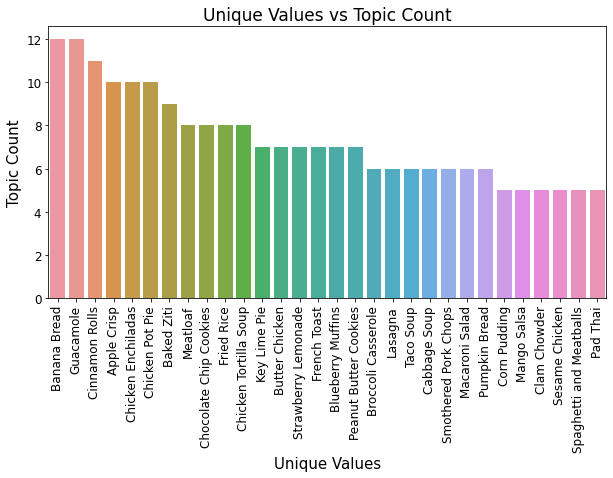

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'unique_values', y = 'counts', data = master_ingredient_dataframe_df_1)
plt.title('Unique Values vs Topic Count' , fontsize = 17)
plt.xlabel('Unique Values', fontsize = 15)
plt.ylabel('Topic Count', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.xticks(rotation = 90)
plt.show()

In [28]:
val_count = dict(zip(list(master_ingredient_dataframe_df_1['unique_values']), list(master_ingredient_dataframe_df_1['counts'])))

In [29]:
master_ingredient_dataframe.head()

,id,ingredients,title,instructions,partition,images,Image_Status,image_id,image_url,image_download_status,image_path
0,000075604a,"[{'text': '2 Chicken thighs'}, {'text': '2 tsp...",Kombu Tea Grilled Chicken Thigh,[{'text': 'Pierce the skin of the chicken with...,train,"[{'id': '6bdca6e490.jpg', 'url': 'https://img-...","{'id': '6bdca6e490.jpg', 'url': 'https://img-g...",6bdca6e490.jpg,https://img-global.cpcdn.com/001_recipes/58069...,Download Success,E:/image/6bdca6e490.jpg
1,000a1936a3,"[{'text': '1 lb Ground beef'}, {'text': '40 oz...",Stuffed peppers,[{'text': 'Cook Ground beef and drain using st...,train,"[{'id': '33df1c1c41.jpg', 'url': 'https://img-...","{'id': '33df1c1c41.jpg', 'url': 'https://img-g...",33df1c1c41.jpg,https://img-global.cpcdn.com/001_recipes/56599...,Download Success,E:/image/33df1c1c41.jpg
2,001098c661,"[{'text': '3 Squids(cut into small squares)'},...",Paella,[{'text': 'Fry the onions and chicken drumstic...,train,"[{'id': '98141b5d94.jpg', 'url': 'https://img-...","{'id': '98141b5d94.jpg', 'url': 'https://img-g...",98141b5d94.jpg,https://img-global.cpcdn.com/001_recipes/58371...,Download Success,E:/image/98141b5d94.jpg
3,00174f1b21,"[{'text': '1 stick Softened Butter'}, {'text':...",Pumpkin Spice Pound Cake,"[{'text': 'Preheat oven to 325 F.'}, {'text': ...",train,"[{'id': '4656fed68d.jpg', 'url': 'http://tasty...","{'id': '4656fed68d.jpg', 'url': 'http://tastyk...",4656fed68d.jpg,http://tastykitchen.com/recipes/wp-content/upl...,Download Success,E:/image/4656fed68d.jpg
4,001aff2ed1,[{'text': '1 whole Recipe (or Store-bought Mix...,Peanut Butter Cookie Dough Brownies,"[{'text': 'Prepare brownie recipe, adding the ...",train,"[{'id': 'a2da36f014.jpg', 'url': 'http://tasty...","{'id': 'a2da36f014.jpg', 'url': 'http://tastyk...",a2da36f014.jpg,http://tastykitchen.com/recipes/wp-content/upl...,Download Success,E:/image/a2da36f014.jpg


In [30]:
master_ingredient_dataframe.shape

(21700, 11)

In [31]:
print(master_ingredient_dataframe.id.nunique())

21700


In [32]:
print(master_ingredient_dataframe.title.nunique())

20000


In [33]:
master_ingredient_dataframe.iloc[[0]]['image_path'].values[0]

'E:/image/6bdca6e490.jpg'

In [34]:
master_ingredient_dataframe.iloc[[1]]['image_path'].values[0]

'E:/image/33df1c1c41.jpg'

In [35]:
def get_top_words_based_on_cnt(words_dict,n_words):
    n_words+=1
    keys=list(words_dict.keys())
    values=list(words_dict.values())
    sorted_values=sorted(values,reverse=True)[:n_words]
    sorted_keys=[]
    for i in sorted_values:
        if sorted_values.count(i)==1:
            sorted_keys.append(keys[values.index(i)])
        elif sorted_values.count(i)==2:
            f_idx=values.index(i)
            s_idx=values[f_idx+1:].index(i)
            s_idx+=f_idx+1
            a,b=keys[f_idx],keys[s_idx]
            if a not in sorted_keys and b not in sorted_keys:
                sorted_keys.append(a)
                sorted_keys.append(b)
    plt.figure(figsize=(10,6))
    sns.barplot(x=sorted_keys,y=sorted_values)
    plt.xticks(rotation=60)
    plt.show()

In [36]:
def text_nltk_operation(text):
    text = repr(text)
    # Text without stopwords
    No_StopWords = [word for word in word_tokenize(text) if word.lower() not in stoplist ]
    # Convert list of tokens_without_stopwords to String type.
    words_string = ' '.join(No_StopWords)    
    text = words_string
    
    
    spell = Speller(lang='en')
    Corrected_text = spell(text)
    text = Corrected_text

    
    lemma = [lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(text)]
    text = lemma
    
    return text

In [37]:
def text_cleaning(text):
    """
    This function will clean the text.
    
    """
    
    pattern = re.compile(r'\s+') 
    Without_whitespace = re.sub(pattern, ' ', text)
    # There are some instances where there is no space after '?' & ')', 
    # So I am replacing these with one space so that It will not consider two words as one token.
    text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')
    
    
    text = unidecode.unidecode(text)
    
    
    text = text.lower()
    
    
    # Pattern matching for all case alphabets
    Pattern_alpha = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)
    # Limiting all the  repeatation to two characters.
    Formatted_text = Pattern_alpha.sub(r"\1\1", text) 
    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    # Limiting punctuations in previously formatted string to only one.
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    # The below statement is replacing repeatation of spaces that occur more than two times with that of one occurrence.
    Final_Formatted = re.sub(' {2,}',' ', Combined_Formatted)
    text = Final_Formatted
    
    
    CONTRACTION_MAP = {"ain't": "is not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have",
                       "'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "i would",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'll've": "i will have",
        "i'm": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have",
        }
    list_Of_tokens = text.split(' ')
    # Checking for whether the given token matches with the Key & replacing word with key's value.
    # Check whether Word is in lidt_Of_tokens or not.
    for Word in list_Of_tokens: 
        # Check whether found word is in dictionary "Contraction Map" or not as a key. 
         if Word in CONTRACTION_MAP: 
                # If Word is present in both dictionary & list_Of_tokens, replace that word with the key value.
                list_Of_tokens = [item.replace(Word, CONTRACTION_MAP[Word]) for item in list_Of_tokens]
    # Converting list of tokens to String.
    String_Of_tokens = ' '.join(str(e) for e in list_Of_tokens) 
    text = String_Of_tokens
    
    
    # The formatted text after removing not necessary punctuations.
    Formatted_Text = re.sub(r"[\'\'-()\"#/@;:<>{}=~|.?,!0-9]", "", text)
#     Formatted_Text = re.sub(r"[^a-zA-Z\:\-,.?!]+", ' ', text) 
    # In the above regex expression,I am providing necessary set of punctuations that are frequent in this particular dataset.
    text = str(Formatted_Text).strip()
    

    return text    

In [38]:
def remove_link(text):
    """
    This function will remove all the occurrences of links.
    
    """
    
    # Removing all the occurrences of links that starts with https
    remove_https = re.sub(r'http\S+', '', text)
    # Remove all the occurrences of text that ends with .com
    remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
    return remove_com

In [39]:
def remove_html_tag(text):
    """ 
    This function will remove all the occurrences of html tags from the text.
      
    """
    # Initiating BeautifulSoup object soup.
    soup = BeautifulSoup(text, "html.parser")
    # Get all the text other than html tags.
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

In [40]:
def remove_newline(text):
    """
    This function will remove all the occurrences of newlines, tabs, and combinations like: \\n, \\.
    
    """
    
    # Replacing all the occurrences of \n,\\n,\t,\\ with a space.
    Formatted_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')
    return Formatted_text

In [41]:
def get_updated_ingredient(data):
    ingr = eval(data)
    ingr = " and ".join([str(ingr_text['text']).lower() for ingr_text in ingr])
#     ingr = re.sub()
    return ingr

In [42]:
master_ingredient_dataframe.iloc[[0]]['ingredients'].values[0]

"[{'text': '2 Chicken thighs'}, {'text': '2 tsp Kombu tea'}, {'text': '1 White pepper'}]"

In [43]:
master_ingredient_dataframe.iloc[[1]]['ingredients'].values[0]

"[{'text': '1 lb Ground beef'}, {'text': '40 oz kidney beans'}, {'text': '1 cooked Jasmine white rice (or your favorite )'}, {'text': '1 medium onion'}, {'text': '4 large large bell peppers'}, {'text': '1 garlic powder'}, {'text': '1 onion powder'}, {'text': '1 can can diced tomatoes ( fiery garlic or your choice )'}, {'text': '24 oz spaghetti sauce (I used garden vegetable )'}, {'text': '1 shredded cheese (sharp cheddar and 6 cheese blend)'}]"

In [44]:
# test_df = master_ingredient_dataframe.head(5)
test_df = master_ingredient_dataframe.copy(deep=True)

In [45]:
# Take all ingredients
# Pandas Progres Apply
# Use tqdm with apply
tqdm.pandas()
test_df['ingredient_v1'] = test_df['ingredients'].progress_apply(get_updated_ingredient)

100%|█████████████████████████████████████████████████████████████████████████| 21700/21700 [00:00<00:00, 28562.88it/s]


In [46]:
test_df.shape

(21700, 12)

In [47]:
test_df['ingredient_v1'].loc[0: 10].values[2]

'3 squids(cut into small squares) and 8 tiger prawns (shelled and uncooked) and 2 red peppers(cubed) and 2 cup peas and 4 chicken drumsticks and 1 onions(cubed) and 1 pinch saffron and 1 packages paella rice and 1 packages mussels in wine sauce and 2 chicken stock and 1 packages cherry tomatoes and 1/2 packages beans'

In [48]:
# Remove newline charecter
# Use tqdm with apply
tqdm.pandas()
test_df['ingredient_v2'] = test_df['ingredient_v1'].progress_apply(remove_newline)

100%|████████████████████████████████████████████████████████████████████████| 21700/21700 [00:00<00:00, 594206.53it/s]


In [49]:
test_df['ingredient_v1'].loc[0: 10].values[2]

'3 squids(cut into small squares) and 8 tiger prawns (shelled and uncooked) and 2 red peppers(cubed) and 2 cup peas and 4 chicken drumsticks and 1 onions(cubed) and 1 pinch saffron and 1 packages paella rice and 1 packages mussels in wine sauce and 2 chicken stock and 1 packages cherry tomatoes and 1/2 packages beans'

In [50]:
# Remove HTML tag
# Use tqdm with apply
tqdm.pandas()
test_df['ingredient_v2'] = test_df['ingredient_v2'].progress_apply(remove_html_tag)

100%|█████████████████████████████████████████████████████████████████████████| 21700/21700 [00:00<00:00, 22394.70it/s]


In [51]:
test_df['ingredient_v1'].loc[0: 10].values[2]

'3 squids(cut into small squares) and 8 tiger prawns (shelled and uncooked) and 2 red peppers(cubed) and 2 cup peas and 4 chicken drumsticks and 1 onions(cubed) and 1 pinch saffron and 1 packages paella rice and 1 packages mussels in wine sauce and 2 chicken stock and 1 packages cherry tomatoes and 1/2 packages beans'

In [52]:
# Remove hyperlink or link
# Use tqdm with apply
tqdm.pandas()
test_df['ingredient_v2'] = test_df['ingredient_v2'].progress_apply(remove_link)

100%|████████████████████████████████████████████████████████████████████████| 21700/21700 [00:00<00:00, 224066.84it/s]


In [53]:
test_df['ingredient_v1'].loc[0: 10].values[2]

'3 squids(cut into small squares) and 8 tiger prawns (shelled and uncooked) and 2 red peppers(cubed) and 2 cup peas and 4 chicken drumsticks and 1 onions(cubed) and 1 pinch saffron and 1 packages paella rice and 1 packages mussels in wine sauce and 2 chicken stock and 1 packages cherry tomatoes and 1/2 packages beans'

In [54]:
# Text Cleaning
# Use tqdm with apply
tqdm.pandas()
test_df['ingredient_v2'] = test_df['ingredient_v2'].progress_apply(text_cleaning)

100%|█████████████████████████████████████████████████████████████████████████| 21700/21700 [00:01<00:00, 15240.26it/s]


In [55]:
test_df['ingredient_v1'].loc[0: 10].values[2]

'3 squids(cut into small squares) and 8 tiger prawns (shelled and uncooked) and 2 red peppers(cubed) and 2 cup peas and 4 chicken drumsticks and 1 onions(cubed) and 1 pinch saffron and 1 packages paella rice and 1 packages mussels in wine sauce and 2 chicken stock and 1 packages cherry tomatoes and 1/2 packages beans'

In [58]:
# Perform NLTK Operations
# Use tqdm with apply
# tqdm.pandas()
test_df['ingredient_nltk'] = test_df['ingredient_v2'].progress_apply(text_nltk_operation)

100%|██████████████████████████████████████████████████████████████████████████| 21700/21700 [2:27:34<00:00,  2.45it/s]


In [60]:
test_df['ingredient_nltk'].loc[0: 10].values[2]

["'squidscut",
 'small',
 'square',
 'tiger',
 'pawn',
 'shell',
 'cook',
 'red',
 'pepperscubed',
 'cup',
 'peas',
 'chicken',
 'drumsticks',
 'onionscubed',
 'pinch',
 'saffron',
 'package',
 'della',
 'rice',
 'package',
 'mussels',
 'wine',
 'sauce',
 'chicken',
 'stock',
 'package',
 'cherry',
 'tomatoes',
 'package',
 'bean',
 "'"]

In [61]:
# Save the NLTK Ingredients Excel
test_df.to_excel(os.path.join(excel_path, "preprocessed_ingredient.xlsx"), index=False, engine='openpyxl')

In [62]:
# def apply_multithreaded_with_progress(func, df, num_threads):
#     results = []
#     with tqdm(total=len(df)) as pbar:
#         def update_progress(*args):
#             pbar.update()
#         with concurrent.futures.ThreadPoolExecutor(max_workers=num_threads) as executor:
#             futures = {executor.submit(func, row): row for _, row in df.iteritems()}
#             for future in concurrent.futures.as_completed(futures):
#                 result = future.result()
#                 results.append(result)
#                 update_progress()
#     return pd.Series(results, index=df.index)

In [63]:
# Apply the function using multithreading with tqdm progress bar
# df['ingredient_nltk'] = apply_multithreaded_with_progress(text_nltk_operation, test_df['ingredient_v2'], num_threads=2000)
# test_df['ingredient_nltk'] = test_df['ingredient_v2'].head(1000).swifter.apply(text_nltk_operation, num_workers=2000, axis=1)